# Принятие решения о увеличении выручки на основании рассмотрения гипотез

Мы осуществляем деятельность аналитика в крупном интернет-магазине. Вместе с отделом маркетинга мы подготовили 9 гипотез для увеличения выручки. 

**Цель исследования:**

Проверка гипотез по увеличению выручки интернет-магазина 

**Ход исследования**

Данные для исследования мы получим тремя файлами:

*   /datasets/hypothesis.csv. - информация о гипотезах; 
*   /datasets/orders.csv - информация о заказах; 
*   /datasets/visitors.csv - информация о пользователях.

Исследование пройдёт в четыре этапа:

1.   Обзор данных.
2.   Обработка данных.
3.   Проверка гипотез:
*   Приоритизация гипотез
*   Анализ A/B-теста

## Обзор данных

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # информация о гипотезах
    pd.read_csv('/datasets/orders.csv'),  # информация о заказах
    pd.read_csv('/datasets/visitors.csv'),  # информация о пользователях
)

**Информация о гипотезах**

In [3]:
hypothesis.info()
display(hypothesis.head())
display('Наименование столбцов')
display(hypothesis.columns)
display(hypothesis.describe())
display('Инофрмация о пропусках')
display(hypothesis.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(hypothesis.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


'Наименование столбцов'

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


'Инофрмация о пропусках'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Инофрмация о долях пропущенных значений'

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

Согласно документации к данным:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Информация о заказах**

In [4]:
orders.info()
display(orders.head())
display('Наименование столбцов')
display(orders.columns)
display(orders.describe())
display('Инофрмация о пропусках')
display(orders.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(orders.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'Наименование столбцов'

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


'Инофрмация о пропусках'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Инофрмация о долях пропущенных значений'

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

Согласно документации к данным:

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.


**Информация о пользователях**

In [5]:
visitors.info()
display(visitors.head())
display('Наименование столбцов')
display(visitors.columns)
display(visitors.describe())
display('Инофрмация о пропусках')
display(visitors.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(visitors.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


'Наименование столбцов'

Index(['date', 'group', 'visitors'], dtype='object')

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Инофрмация о пропусках'

date        0
group       0
visitors    0
dtype: int64

'Инофрмация о долях пропущенных значений'

date        0.0
group       0.0
visitors    0.0
dtype: float64

Согласно документации к данным:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


## Обработка данных

### Приведение столбцов с указанием времени к формату datetime

In [6]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Изменение стиля в наименованиях столбцов

In [9]:
hypothesis.columns = hypothesis.columns.str.lower()

In [10]:
display('Наименование столбцов')
display(hypothesis.columns)

'Наименование столбцов'

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Анализ на наличие дубликатов

In [11]:
'Полные дубликаты'
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

In [12]:
display(hypothesis.dtypes)
display(orders.dtypes)
display(visitors.dtypes)

hypothesis    object
reach          int64
impact         int64
confidence     int64
efforts        int64
dtype: object

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [13]:
'Проверять на неявные дубликаты целесообразно только столбцы с типом данных object'

display(f"Количество неявных дубликатов: {hypothesis['hypothesis'].nunique()}")
display(hypothesis.sort_values(by='hypothesis')['hypothesis'].unique())

display(f"Количество неявных дубликатов: {orders['group'].nunique()}")
display(orders.sort_values(by='group')['group'].unique())

display(f"Количество неявных дубликатов: {visitors['group'].nunique()}")
display(visitors.sort_values(by='group')['group'].unique())

'Количество неявных дубликатов: 9'

array(['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'],
      dtype=object)

'Количество неявных дубликатов: 2'

array(['A', 'B'], dtype=object)

'Количество неявных дубликатов: 2'

array(['A', 'B'], dtype=object)

### Проверка данных на аномалии

In [14]:
'Проверка данных на аномалии'
display(hypothesis.head())
display(orders.head())
display(visitors.head())

display(hypothesis.describe())
display(orders.describe())
display(visitors.describe())

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,reach,impact,confidence,efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [15]:
display(hypothesis['hypothesis'].value_counts())
display(hypothesis['reach'].value_counts())
display(hypothesis['impact'].value_counts())
display(hypothesis['confidence'].value_counts())
display(hypothesis['efforts'].value_counts())

Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию 

3     3
8     2
1     1
2     1
5     1
10    1
Name: reach, dtype: int64

3     3
1     1
2     1
5     1
7     1
9     1
10    1
Name: impact, dtype: int64

8    3
1    1
2    1
3    1
4    1
7    1
9    1
Name: confidence, dtype: int64

3     3
5     2
1     1
6     1
8     1
10    1
Name: efforts, dtype: int64

In [16]:
display(orders['transactionId'].value_counts())
display(orders['visitorId'].value_counts())
display(orders['date'].value_counts())
display(orders['revenue'].value_counts())
display(orders['group'].value_counts())

1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transactionId, Length: 1197, dtype: int64

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorId, Length: 1031, dtype: int64

2019-08-05    48
2019-08-12    47
2019-08-14    47
2019-08-15    46
2019-08-06    46
2019-08-01    45
2019-08-28    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-29    42
2019-08-07    42
2019-08-26    41
2019-08-22    41
2019-08-09    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-18    26
2019-08-11    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

990       17
890       13
390       13
1190      10
400       10
          ..
6440       1
45780      1
725        1
9800       1
202740     1
Name: revenue, Length: 713, dtype: int64

B    640
A    557
Name: group, dtype: int64

In [17]:
display(visitors['date'].value_counts())
display(visitors['group'].value_counts())
display(visitors['visitors'].value_counts())

2019-08-27    2
2019-08-24    2
2019-08-08    2
2019-08-14    2
2019-08-20    2
2019-08-26    2
2019-08-01    2
2019-08-07    2
2019-08-13    2
2019-08-19    2
2019-08-25    2
2019-08-31    2
2019-08-06    2
2019-08-12    2
2019-08-18    2
2019-08-30    2
2019-08-21    2
2019-08-05    2
2019-08-11    2
2019-08-17    2
2019-08-23    2
2019-08-29    2
2019-08-04    2
2019-08-10    2
2019-08-16    2
2019-08-22    2
2019-08-28    2
2019-08-03    2
2019-08-09    2
2019-08-15    2
2019-08-02    2
Name: date, dtype: int64

B    31
A    31
Name: group, dtype: int64

610    2
718    2
654    2
490    2
609    1
717    1
719    1
720    1
721    1
594    1
722    1
468    1
595    1
756    1
735    1
769    1
711    1
668    1
487    1
361    1
746    1
619    1
748    1
621    1
369    1
628    1
709    1
378    1
507    1
713    1
581    1
770    1
413    1
644    1
646    1
650    1
395    1
655    1
737    1
531    1
502    1
406    1
667    1
412    1
543    1
707    1
544    1
546    1
676    1
421    1
617    1
679    1
560    1
656    1
699    1
575    1
577    1
509    1
Name: visitors, dtype: int64

Проверим выручку

In [18]:
orders['revenue'].describe().round()

count       1197.0
mean        8348.0
std        39191.0
min           50.0
25%         1220.0
50%         2978.0
75%         8290.0
max      1294500.0
Name: revenue, dtype: float64

In [19]:
orders['revenue'].sort_values(ascending=False).head(10)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
682       78990
662       78990
743       67990
1103      66350
1099      65710
Name: revenue, dtype: int64

Проверим пользователей

In [20]:
visitors.sort_values(by=['group', 'visitors']).groupby('group').agg({'visitors': 'sum'})

,visitors
group,
A,18736
B,18916


In [21]:
visitors['visitors'].sum()

37652

In [22]:
visitors_a = visitors[visitors['group']=='A'].sum()['visitors']
visitors_a

18736

In [23]:
visitors_b = visitors[visitors['group']=='B'].sum()['visitors']
visitors_b

18916

In [24]:
visitors[visitors['group']=='A'].sum()['visitors']/visitors['visitors'].sum()

0.4976096887283544

Проверим заказы

In [25]:
orders['group'].value_counts().sort_values()

A    557
B    640
Name: group, dtype: int64

In [26]:
orders['group'].count()

1197

In [27]:
# orders.query('group == "A"').value_counts().sum()
# np.sum(orders['group'] == 'A')
orders_a = orders[orders['group']=='A'].count()['group']
orders_a

557

In [28]:
orders_b = orders[orders['group']=='B'].count()['group']
orders_b

640

In [29]:
orders[orders['group']=='A'].count()['group']/orders['group'].count()

0.4653299916457811

#### Проверка гипотезы о равенстве долей

In [30]:
alpha = .05 # критический уровень статистической значимости

orders_check = np.array([orders_a, orders_b])
visitors_check = np.array([visitors_a, visitors_b])

# пропорция успехов в первой группе:
p1 = orders_check[0]/visitors_check[0]

# пропорция успехов во второй группе:
p2 = orders_check[1]/visitors_check[1]

# пропорция успехов в комбинированном датасете:
p_combined = (orders_check[0] + orders_check[1]) / (visitors_check[0] + visitors_check[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/visitors_check[0] + 1/visitors_check[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / visitors_check[0] + 1 / visitors_check[1])
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Проверка данных на нормальность. Критерий Шапиро-Уилка

In [31]:
visitors_list = visitors['visitors'].tolist()

In [32]:
sample_1 = visitors_list

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_1)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.002020221436396241
Отвергаем нулевую гипотезу: распределение не нормально


In [33]:
visitors_a = visitors[visitors['group']=='A']
visitors_a_list = visitors_a['visitors'].tolist()

In [34]:
sample_1 = visitors_a_list

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_1)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.029194815084338188
Отвергаем нулевую гипотезу: распределение не нормально


In [35]:
visitors_b = visitors[visitors['group']=='B']
visitors_b_list = visitors_b['visitors'].tolist()

In [36]:
sample_1 = visitors_b_list

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_1)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.036449261009693146
Отвергаем нулевую гипотезу: распределение не нормально


### Вывод

При обработаке данных: 
- Произведено изменение стиля в наименованиях столбцов
- Произведено приведение столбцов с указанием времени к формату datetime
- Выявлено что полные и неявные дубликаты отсутствуют
- Выявлена аномальная выручка, max - 1 294 500
- Выявлено что пользователей попавших в категорию А - 18 736 (или 49,8 %) , а в котегорию B - 18 916 (или 50,2 %), а заказов попавших в категорию А - 557 (или 47 %) , а в котегорию B - 640 (или 53 %) - между долями есть значимая разница.
- Выявлено что распределение пользователей по критерию Шапиро-Уилкане не нормально


## Проверка гипотез

### Приоритизация гипотез

#### Применение фреймворка ICE для приоритизации гипотез

In [67]:
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [68]:
pd.options.display.max_colwidth = 210

#### Примение фреймворка RICE для приоритизации гипотез

In [69]:
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


#### Вывод

По фреймворку ICE наибольшую оценку имели гипотезы 8,0 и 7. Однако после применения фреймворка RICE перечень изменился на гпиотезы 7,2 и 0. Так получилось, потому что параметр `reach` в гипотезе 7 равен 10, в то время как у других гипотез он меньше.
В фреймворка RICE мы учитываем скольких пользователей затронет изменение, которое мы хотим внести это является существенным фактором. Приоритетными гипотезами будут 7, 2, 0.

### Анализ A/B-теста

#### График кумулятивной выручки по группам

In [41]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = (
    dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = (
    orders_aggregated
    .merge(visitors_aggregated, left_on=['date', 'group'],
    right_on=['date', 'group'])
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


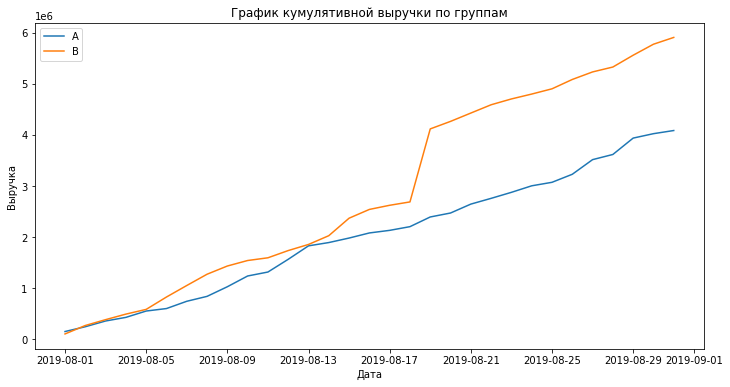

In [42]:
cumulative_revenue_a= cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,6))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

Кумулятивная выручка по группам увеличивается в течение всего теста.
Группа B показывает большую выручку чем группа A. 
2019-08-19 в  группе B происходит резкий рост - это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### График кумулятивного среднего чека по группам

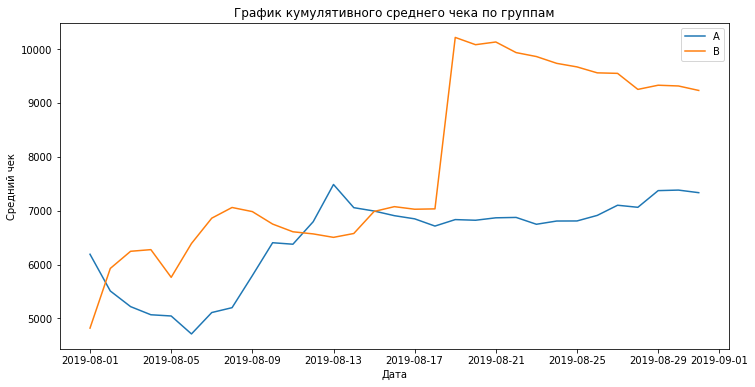

In [43]:
plt.figure(figsize=(12,6))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Кумулятивный средний чек до 2019-08-19 относительно стабилен для всех групп. После 2019-08-19 происходит резкий всплеск в группе B - вероятно это обусловлено аномалией.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

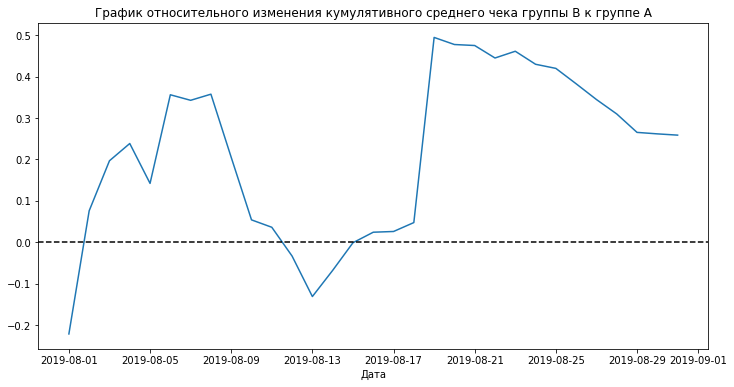

In [44]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

В нескольких точках график относительного изменения кумулятивного среднего чека резко колеблется. Необходимо проверить данные на наличие аномалий.

#### График кумулятивной конверсии по группам

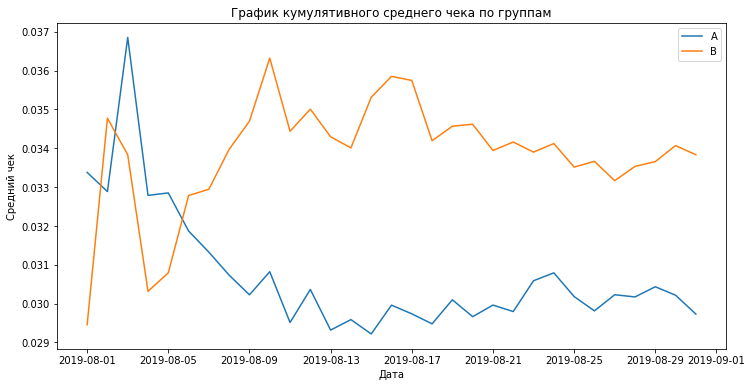

In [45]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(12,6))

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

График кумулятивного среднего чека по группам относительно симметричен. С 2019-08-06 гуппа B стабильно показывает большую конверсию чем группа A.

#### График относительного изменения кумулятивной конверсии группы B к группе A

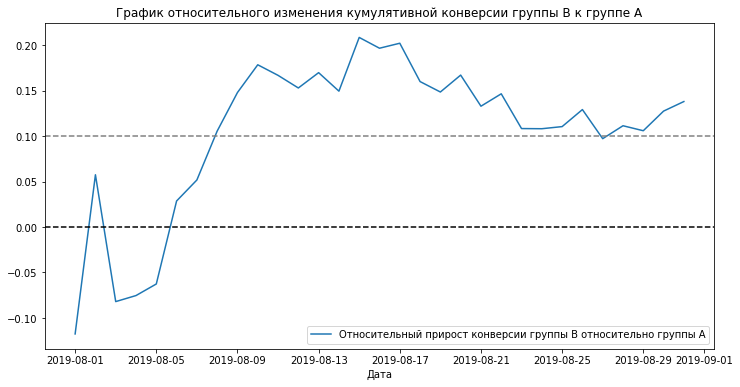

In [46]:
merged_cumulative_conversions = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(12,6))

plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.show()

Группа B лидирует относительного изменения кумулятивной конверсии - зафиксировалась свыше 10% относительно группы A.

#### Точечный график количества заказов по пользователям

In [47]:
orders_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_users.columns = ['userId', 'orders']

print(orders_users.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


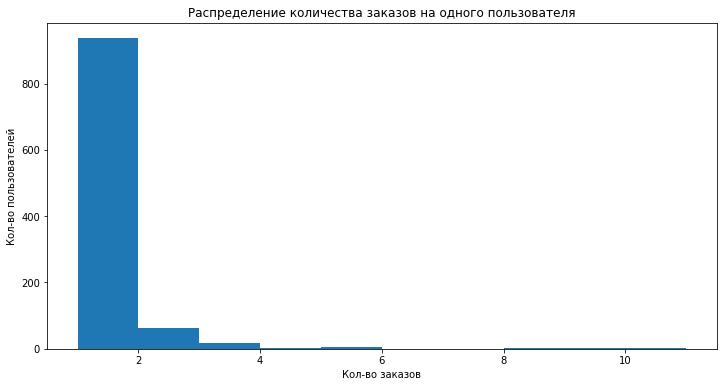

In [48]:
plt.figure(figsize=(12,6))
plt.hist(orders_users['orders']) 
plt.title('Распределение количества заказов на одного пользователя')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Кол-во заказов')
plt.show()

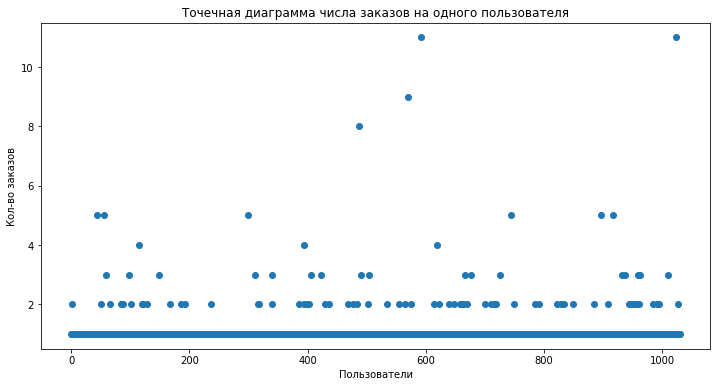

In [49]:
x_values = pd.Series(range(0,len(orders_users)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_users['orders']) 
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Кол-во заказов')
plt.xlabel('Пользователи')
plt.show()

Большинство пользователей совершают по 1 заказу. Много пользователей с 2-3 заказами. Свыше 2 являются исключениями.

#### 95-й и 99-й перцентили количества заказов на пользователя

In [50]:
percentiles =  np.percentile(orders_users['orders'], [95, 99])
print('Перцентили:\n95: {:.2f}\n99: {:.2f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 2.00
99: 4.00


Не более 5% пользователей оформляли больше чем 2 заказа. 1% пользователей заказывали более 4 раз.
Разумно выбрать 3,4 и 5 заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней, оставив пользователей с 1 до 2 заказов.

#### Точечный график стоимостей заказов

In [51]:
orders_max = orders['revenue'].max()

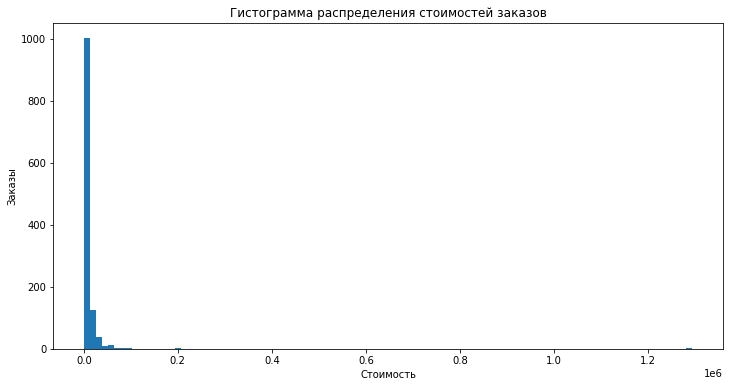

In [52]:
plt.figure(figsize=(12,6))
plt.hist(orders['revenue'], range=(0, orders_max), bins = 100) 
plt.title('Гистограмма распределения стоимостей заказов')
plt.ylabel('Заказы')
plt.xlabel('Стоимость')
plt.show()

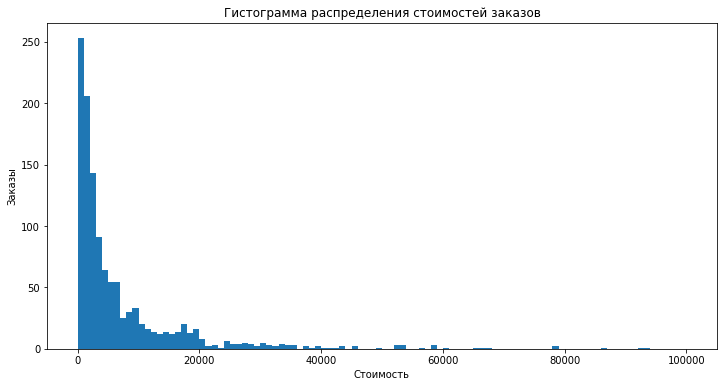

In [53]:
plt.figure(figsize=(12,6))
plt.hist(orders['revenue'], range=(0, 100000), bins = 100) 
plt.title('Гистограмма распределения стоимостей заказов')
plt.ylabel('Заказы')
plt.xlabel('Стоимость')
plt.show()

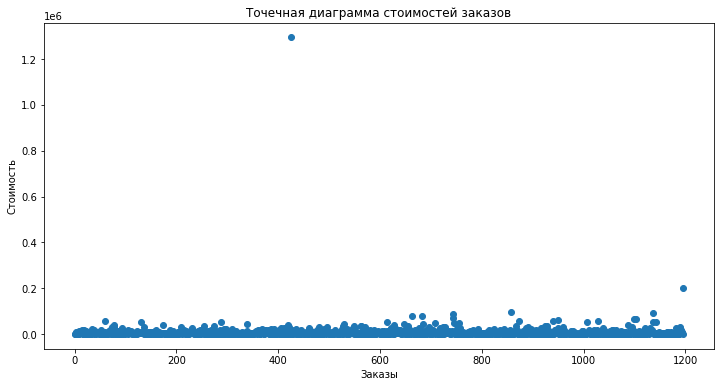

In [54]:
plt.figure(figsize=(12,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма стоимостей заказов')
plt.ylabel('Стоимость')
plt.xlabel('Заказы')
plt.show()

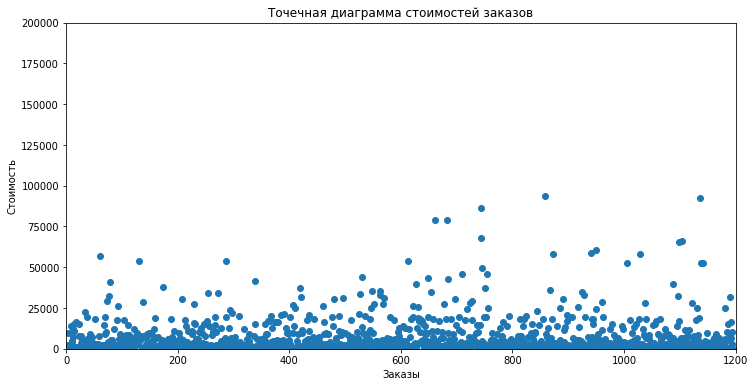

In [55]:
plt.figure(figsize=(12,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1200, 0, 200000])
plt.title('Точечная диаграмма стоимостей заказов')
plt.ylabel('Стоимость')
plt.xlabel('Заказы')
plt.show()

Присутствует несколько дорогих заказов. По графику можно выбрать границу аномальных заказов - от 25 000. 

#### 95-й и 99-й перцентили стоимости заказов

In [56]:
percentiles =  np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 28000
99: 58233


Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233.

#### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [57]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [58]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: {0:f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B по отношению к группе A: {0:f}'.format(sampleB.mean() / sampleA.mean() - 1))


P-value: 0.016792
Относительный прирост конверсии группы B по отношению к группе A: 0.138079


Нулевая гипотеза -  Конверсия групп А и B по «сырым» данным равна

Альтернативная гипотеза - Конверсия групп А и B по «сырым» данным различается

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [59]:
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A: 0.138079
P-value: 0.016792355056752608
По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


По «сырым» данным различия в конверсии групп A и B значимы. Относительный проигрыш группы B равен 13.8 %.

Принимаем альтернативную гипотезу - Конверсия групп А и B по «сырым» данным различается

Нулевая гипотеза отвергнута

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза -  Средний чек групп А и B по «сырым» данным равен

Альтернативная гипотеза - Средний чек групп А и B по «сырым» данным различается

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [60]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {0:f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A: 0.258714
P-value: 0.7292909855432458
По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


По «сырым» данным различия в средних чеках в группах A и B НЕТ! Относительный проигрыш группы B равен 25.9 %.

Подтверждаем нулевую гипотезу - Средний чек групп А и B по «сырым» данным равен

Альтернативная гипотеза отвергнута

#### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Cколько всего аномальных пользователей

In [61]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


In [62]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [63]:
print('P-value: {0:f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B по отношению к группе A после очистки данных: {0:f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.013043
Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.172701


Нулевая гипотеза -  Конверсия групп А и B по «очищенным» данным равна

Альтернативная гипотеза - Конверсия групп А и B по «очищенным» данным различается

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [64]:
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.172701
P-value: 0.013042592743036745
По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


По «очищенным» данным различия в конверсии групп A и B значимы. Относительный проигрыш группы B равен 17.3 %.

Принимаем альтернативную гипотезу - Конверсия групп А и B по «очищенным» данным различается

Нулевая гипотеза отвергнута

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [65]:
print('P-value: {0:f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {0:f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738482
Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.019624


Нулевая гипотеза -  Средний чек групп А и B по «очищенным» данным равен

Альтернативная гипотеза - Средний чек групп А и B по «очищенным» данным различается

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [66]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.019624
P-value: 0.738481751314565
По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


По «очищенным» данным различия в средних чеках в группах A и B НЕТ! Относительный проигрыш группы B равен - 0.02 %.

Подтверждаем нулевую гипотезу - Средний чек групп А и B по «очищенным» данным равен

Альтернативная гипотеза отвергнута

## Общий вывод

По порядку. Выборка данных имеет корректный размер, проблему подглядывания в результате сравнения групп во время проведения теста мы исключили! Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных. Данная разница показателей конверсии между группами и до и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B!